In [55]:
import pandas as pd 
import numpy as np 


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('./data/dataset.csv')

In [58]:
data.head(10)

,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,awards_count
0,0,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,Harper Lee,95178,4751916,4.28,324,1960,True,"['Classics', 'Fiction', 'Historical']","Pulitzer Prize for Fiction (1961), Audie Award...",United States,4
1,1,https://www.goodreads.com/book/show/40961427-1984,1984,George Orwell,76077,3365418,4.19,237,1949,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (1984), Locus Aw...",United Kingdom,2
2,2,https://www.goodreads.com/book/show/3.Harry_Po...,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,",119110,7511380,4.48,309,1997,True,"['Fantasy', 'Fiction', 'Young Adult']",Mythopoeic Fantasy Award for Children's Litera...,United Kingdom,27
3,3,https://www.goodreads.com/book/show/4671.The_G...,The Great Gatsby,"F. Scott Fitzgerald,",71655,3980916,3.93,200,1925,False,"['Classics', 'Fiction', 'Academic']",Grammy Award Nominee for Best Spoken Word Albu...,United States,2
4,4,https://www.goodreads.com/book/show/170448.Ani...,Animal Farm,"George Orwell,",61102,2911765,3.96,141,1945,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (2011), Retro Hu...",NaN,2
5,5,https://www.goodreads.com/book/show/5907.The_H...,"The Hobbit, or There and Back Again",J.R.R. Tolkien,51262,3046381,4.28,366,1937,True,"['Fantasy', 'Classics', 'Fiction']","Keith Barker Millennium Book Award, Books I Lo...",NaN,3
6,6,https://www.goodreads.com/book/show/48855.The_...,The Diary of a Young Girl,"Anne Frank,",30844,2915718,4.16,283,1947,False,"['Nonfiction', 'Classics', 'History']",Luisterboek Award Nominee (2008),Netherlands,1
7,7,https://www.goodreads.com/book/show/157993.The...,The Little Prince,"Antoine de Saint-Exupéry,",43253,1483170,4.31,93,1943,False,"['Classics', 'Fiction', 'Fantasy']",Retro Hugo Award for Best Novella (2019),NaN,1
8,8,https://www.goodreads.com/book/show/13079982-f...,Fahrenheit 451,Ray Bradbury,51261,1786718,3.99,194,1953,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (1984), Geffen A...",NaN,4
9,9,https://www.goodreads.com/book/show/5107.The_C...,The Catcher in the Rye,J.D. Salinger,60375,2858812,3.81,277,1951,False,"['Classics', 'Fiction', 'Young Adult']",Teen Read Award Nominee for Best All-Time-Fave...,United States,2


In [59]:
data.describe()

,Unnamed: 0,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,awards_count
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000
mean,306.500000,10785.221498,3.882001e+05,4.067899,397.662866,1970.258958,2.802932
std,177.390811,15953.357287,7.837616e+05,0.190449,258.373837,22.530958,2.966137
min,0.000000,165.000000,2.815000e+03,3.540000,26.000000,1901.000000,1.000000
25%,153.250000,2130.500000,4.447750e+04,3.940000,225.000000,1955.000000,1.000000
50%,306.500000,4883.500000,1.203915e+05,4.080000,331.000000,1975.000000,2.000000
75%,459.750000,12211.000000,3.542418e+05,4.197500,482.750000,1989.000000,4.000000
max,613.000000,119110.000000,7.511380e+06,4.570000,1796.000000,2003.000000,27.000000


In [60]:
data.columns

Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'awards_count'],
      dtype='object')

In [61]:
#- Load the data in a `pandas` DataFrame
# - Transform the column `awards` into a numerical column, containing only the numbers of awards (if any) won by the novel. For example, in [https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone](https://www.goodreads.com/book/show/3.Harry_Potter_and_the_Sorcerer_s_Stone) there are 27 awards.
# - You know that a lot of reviews have a value between 4 and 5, and it is very hard to spot a difference between the different ratings. For this reason, you have to transform the `avg_ratings` column using the following criteria:
data['awards'].value_counts()

Lewis Carroll Shelf Award (1958)                                                                                                                                                            5
National Book Award Finalist for Fiction (1962)                                                                                                                                             4
Margaret A. Edwards Award (2011)                                                                                                                                                            3
California Young Readers Medal Nominee for Primary (1976)                                                                                                                                   3
Los Angeles Times Book Prize for Fiction (1984)                                                                                                                                             3
                                                  

In [62]:
# data['num_awards'] 
numb_of_awards = []
for award in data['awards']:
    award_list = (award.split(','))
    numb_of_awards.append(len(award_list))
# [data['num_awards'].append(i) for i in data['awards'].split()]
# numb_of_awards[:5]
# for d in data['awards']:
#     print(d)

# data['awards'].isna().sum()
# noa = np.array(numb_of_awards)
# noa = noa <= 1
# for v in data[noa]['awards'].values:
#     if len(v) <=1:
#         print(v)
# numb_of_awards


In [63]:
data.dtypes

Unnamed: 0                 int64
url                       object
title                     object
author                    object
num_reviews                int64
num_ratings                int64
avg_rating               float64
num_pages                  int64
original_publish_year      int64
series                      bool
genres                    object
awards                    object
places                    object
awards_count               int64
dtype: object

In [64]:
data['num_awards'] = numb_of_awards
data.columns

Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'awards_count', 'num_awards'],
      dtype='object')

In [70]:
# Min-max normal
data['avg_rating'].isna().sum()

0

In [66]:
new_avg_rating = []
for rating in data['avg_rating']:
    nominator = rating-min(data['avg_rating'])
    denominator = max(data['avg_rating'])- min(data['avg_rating'])

    new_avg_rating.append(1+ (nominator/denominator)*9)
# new_avg_rating

In [68]:
# new_avg_rating

In [ ]:
data['minmax_norm_ratings'] = new_avg_rating

In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'awards_count', 'num_awards',
       'minmax_norm_ratings'],
      dtype='object')

In [ ]:
data['minmax_norm_ratings']

0      7.466019
1      6.679612
2      9.213592
3      4.407767
4      4.669903
         ...   
609    6.417476
610    5.805825
611    6.504854
612    5.194175
613    6.067961
Name: minmax_norm_ratings, Length: 614, dtype: float64

In [ ]:
# MEan normalization
mean_normal = []
for rating in new_avg_rating:
    numerator = rating - data['minmax_norm_ratings'].mean()
    denominator = max(data['minmax_norm_ratings']) - min(data['minmax_norm_ratings'])
    mean_normal.append(numerator/denominator)
# mean_normal  


In [ ]:
data['mean_norm_ratings'] = mean_normal

In [ ]:
data['mean_norm_ratings']

0      0.205923
1      0.118545
2      0.400098
3     -0.133883
4     -0.104756
         ...   
609    0.089418
610    0.021457
611    0.099127
612   -0.046504
613    0.050583
Name: mean_norm_ratings, Length: 614, dtype: float64

In [ ]:
# Group the books by original_publish_year and get the mean of the minmax_norm_ratings of the groups.
data.groupby(by = 'original_publish_year')['minmax_norm_ratings'].mean()

original_publish_year
1901    6.330097
1902    5.543689
1908    4.844660
1910    6.155340
1913    5.980583
          ...   
1998    5.723301
1999    5.782831
2000    5.667047
2001    2.922330
2003    7.116505
Name: minmax_norm_ratings, Length: 88, dtype: float64

In [ ]:
# 2. Create a function that given an author as input it returns her/his book with the highest `minmax_norm_ratings`.
def highest_rating():
    name = input('Give the name of author: ')

    return max(data['minmax_norm_ratings'])

# So to do it , first check for author name titles of books and max of min_max between them 

In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'awards_count', 'num_awards', 'minmax_norm_ratings',
       'mean_norm_ratings'],
      dtype='object')

In [ ]:
data['author']

0                 Harper Lee
1              George Orwell
2             J.K. Rowling, 
3      F. Scott Fitzgerald, 
4            George Orwell, 
               ...          
609        Madeleine L'Engle
610         John     Nichols
611            Mary  Stewart
612            Russell Hoban
613           Bruno Schulz, 
Name: author, Length: 614, dtype: object

In [ ]:
data.head()

,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,awards_count,num_awards,minmax_norm_ratings,mean_norm_ratings
0,0,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,Harper Lee,95178,4751916,4.28,324,1960,True,"['Classics', 'Fiction', 'Historical']","Pulitzer Prize for Fiction (1961), Audie Award...",United States,4,4,7.466019,0.205923
1,1,https://www.goodreads.com/book/show/40961427-1984,1984,George Orwell,76077,3365418,4.19,237,1949,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (1984), Locus Aw...",United Kingdom,2,2,6.679612,0.118545
2,2,https://www.goodreads.com/book/show/3.Harry_Po...,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,",119110,7511380,4.48,309,1997,True,"['Fantasy', 'Fiction', 'Young Adult']",Mythopoeic Fantasy Award for Children's Litera...,United Kingdom,27,27,9.213592,0.400098
3,3,https://www.goodreads.com/book/show/4671.The_G...,The Great Gatsby,"F. Scott Fitzgerald,",71655,3980916,3.93,200,1925,False,"['Classics', 'Fiction', 'Academic']",Grammy Award Nominee for Best Spoken Word Albu...,United States,2,2,4.407767,-0.133883
4,4,https://www.goodreads.com/book/show/170448.Ani...,Animal Farm,"George Orwell,",61102,2911765,3.96,141,1945,False,"['Classics', 'Fiction', 'Science Fiction']","Prometheus Hall of Fame Award (2011), Retro Hu...",NaN,2,2,4.669903,-0.104756


In [ ]:
data.groupby(by = '')

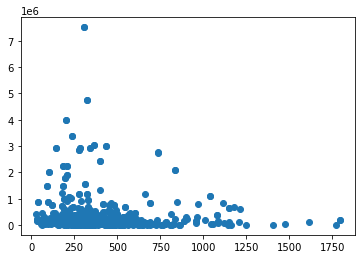

In [ ]:
plt.scatter(x = data['num_pages'], y= data['num_ratings'])
plt.set_xlabel = 'num_pages'
plt.set_ylabel = 'num_ratings'
# corellation equal about 0 

In [ ]:
# 2. Can you compute numerically the correlation coefficient of these two columns?
data['num_pages'].corr(data['num_ratings'])
# they are slightly negative skewed

-0.08759030536747366

C:\Users\Lenovo\anaconda3.1\envs\strive\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rating', ylabel='count'>

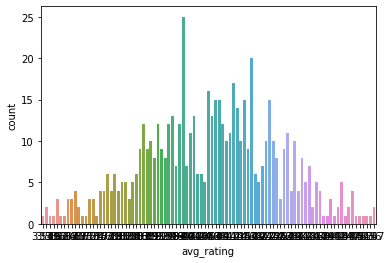

In [ ]:
# 3. Visualise the `avg_rating` distribution.
sns.countplot(data['avg_rating'])

In [ ]:
# 4. Visualise the `minmax_norm_rating` distribution.
# 5. Visualise the `mean_norm_rating` distribution.
# 6. Create one graph that represents in the same figure both `minmax_norm_rating` and `mean_norm_rating`distributions.
# 7. What is the best fit in terms of a distribution (normal, chi-squared...) to represent each of those graphs? 
#     - You can use `Scipy-Stats` [Library](https://docs.scipy.org/doc/scipy/reference/stats.html) to figure out the best fitting distribution like in this [example](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python).